**Task 1**

**Introduction:**

In financial markets, placing a market order often results in execution at multiple price levels, especially when order size exceeds the best available quote. The deviation between the execution price and the mid-price is called slippage, and it reflects the temporary price impact caused by the trade.

We define the temporary impact function
𝑔
𝑡
(
𝑥
)
g
t
​
 (x) as the slippage incurred when executing an order of size
𝑥
x at time
𝑡
t. The goal of this task is to understand how to model
𝑔
𝑡
(
𝑥
)
g
t
​
 (x) using real limit order book data from three stocks: CRWV, FROG, and SOUN.


**Data and Methodology:**

The dataset contains timestamped limit order book events for each stock, including limit order additions, trades, prices, and sizes. We extract a one-minute snapshot of the ask-side limit orders at 13:30 for each ticker and simulate market buy orders of increasing size
𝑥
=
1
,
2
,
.
.
.
,
50
x=1,2,...,50.

For each
𝑥
x, we compute the average execution price by filling from the best ask upward, and subtract the mid-price to compute slippage
𝑔
𝑡
(
𝑥
)
g
t
​
 (x). The mid-price is estimated as the average of the maximum and minimum observed prices in the minute window.



**Modeling
𝑔
𝑡
(
𝑥
)
g
t
​
 (x):**

1. Linear Model:

g
t
​
 (x)=β
t
​
 x

This model assumes slippage increases proportionally with order size. It is easy to compute but fails to capture depth limitations — especially when large orders consume multiple levels.






2. Power-Law Model:

g
t
​
 (x)=αx
γ
 ,γ>1

This model accounts for the convex growth of slippage due to increasing scarcity of liquidity as more depth is consumed. It is more realistic than the linear model and it is also widely used in execution algorithms.


3. Piecewise or Step-Based Model:
This model directly simulates market order execution from the limit order book — matching what we implemented. Slippage peaks at points where order size overwhelms the volume at a single price level and must spill over into worse prices.

**Results and Observations:**

More accurate than linear model and frequently used in execution algorithms.



 Slippage increasing at positions where order size exceeds the volume at one price level and must sUsing 13:30 data:



CRWV: Slippage is very flat over orders of all sizes, suggesting deep liquidity at top levels.



FROG: Slippage increasing sharply above small order sizes, with low liquidity and a highly convex g
t
​
 (x).





SOUN: Slippage rises even for tiny orders but plateaus, possibly due to a huge spread but deep enough just beyond the best quote.



These patterns have been demonstrated with plots of g
t
​
 (x) for each stock, and they exhibit the same effects as illustrated in the conceptual Figures 1–4 provided with the problem statement — where big orders consume several book levels and result in better execution prices.pill into worse prices


**Conclusion:**

The temporary impact function
𝑔
𝑡
(
𝑥
)
g
t
​
 (x) is best modeled as nonlinear. While a linear approximation might work for very small trades, it underestimates risk and cost at realistic trade sizes. Our simulation results support the use of a power-law or step-wise LOB-based model to accurately capture slippage.

We recommend against oversimplified linear models and encourage using real-time order book data to dynamically estimate slippage using a depth-aware approach.

In [9]:
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [11]:
file_path = '/content/Data-20250726T110940Z-1-001.zip'
extract_dir = '/content/extracted_data'

In [12]:
os.makedirs(extract_dir, exist_ok=True)

In [13]:
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [14]:
print("Files extracted:")
for root, dirs, files in os.walk(extract_dir):
    for name in files:
        print(os.path.join(root, name))
    for name in dirs:
         print(os.path.join(root, name))

Files extracted:
/content/extracted_data/Data
/content/extracted_data/Data/CRWV.zip
/content/extracted_data/Data/SOUN.zip
/content/extracted_data/Data/How to use data.docx
/content/extracted_data/Data/FROG.zip


In [15]:
data_folder_path = os.path.join(extract_dir, 'Data')
if os.path.exists(data_folder_path):
    print(f"\nFiles inside {data_folder_path}:")
    for item in os.listdir(data_folder_path):
        print(os.path.join(data_folder_path, item))


Files inside /content/extracted_data/Data:
/content/extracted_data/Data/CRWV.zip
/content/extracted_data/Data/SOUN.zip
/content/extracted_data/Data/How to use data.docx
/content/extracted_data/Data/FROG.zip


In [25]:
datas = ['CRWV.zip', 'FROG.zip', 'SOUN.zip']
for zip_file in datas:
    zip_path = os.path.join(data_folder_path, zip_file)
    datas_name = zip_file.replace('.zip', '')
    extract_path = os.path.join(data_folder_path, datas_name)
    os.makedirs(extract_path, exist_ok=True)

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"Extracted {datas} to {extract_path}")

Extracted ['CRWV.zip', 'FROG.zip', 'SOUN.zip'] to /content/extracted_data/Data/CRWV
Extracted ['CRWV.zip', 'FROG.zip', 'SOUN.zip'] to /content/extracted_data/Data/FROG
Extracted ['CRWV.zip', 'FROG.zip', 'SOUN.zip'] to /content/extracted_data/Data/SOUN


In [19]:
crwv = pd.read_csv(os.path.join(data_folder_path, "CRWV", "CRWV_2025-05-02 00:00:00+00:00.csv"))
frog = pd.read_csv(os.path.join(data_folder_path, "FROG", "FROG_2025-05-02 00:00:00+00:00.csv"))
soun = pd.read_csv(os.path.join(data_folder_path, "SOUN", "SOUN_2025-05-02 00:00:00+00:00.csv"))

In [23]:
print(crwv.head(5))
print(frog.head(5))
print(soun.head(5))

                              ts_event                           ts_event.1  \
0  2025-05-02 13:30:00.385066943+00:00  2025-05-02 13:30:00.385066943+00:00   
1  2025-05-02 13:30:00.830134278+00:00  2025-05-02 13:30:00.830134278+00:00   
2  2025-05-02 13:30:00.830134278+00:00  2025-05-02 13:30:00.830134278+00:00   
3  2025-05-02 13:30:00.932151709+00:00  2025-05-02 13:30:00.932151709+00:00   
4  2025-05-02 13:30:00.934279465+00:00  2025-05-02 13:30:00.934279465+00:00   

   rtype  publisher_id  instrument_id action side  depth  price  size  ...  \
0     10             2          20613      A    A      0  46.94   800  ...   
1     10             2          20613      T    N      0  46.72     2  ...   
2     10             2          20613      T    N      0  46.74     1  ...   
3     10             2          20613      T    N      0  46.75     1  ...   
4     10             2          20613      T    N      0  46.76     1  ...   

   ask_sz_08  bid_ct_08  ask_ct_08  bid_px_09  ask_px_09

In [31]:
def plot_impact(df, name):
    df['ts'] = pd.to_datetime(df['ts_event'])
    start = pd.Timestamp('2025-05-02 13:30:00+00:00')
    end = start + pd.Timedelta(minutes=1)
    sub = df[(df['ts'] >= start) & (df['ts'] < end)]
    sub = sub[(sub['action'] == 'A') & (sub['side'] == 'A')]
    book = sub.groupby('price')['size'].sum().sort_index()

    x_vals = []
    g_vals = []

    for x in range(1, 51):
        left = x
        cost = 0
        for price, size in book.items():
            take = min(size, left)
            cost += take * price
            left -= take
            if left <= 0:
                break
        if left > 0:
            g_vals.append(None)
        else:
            avg_price = cost / x
            mid = (df['price'].max() + df['price'].min()) / 2
            slippage = avg_price - mid
            x_vals.append(x)
            g_vals.append(slippage)

    plt.plot(x_vals, g_vals, label=name)

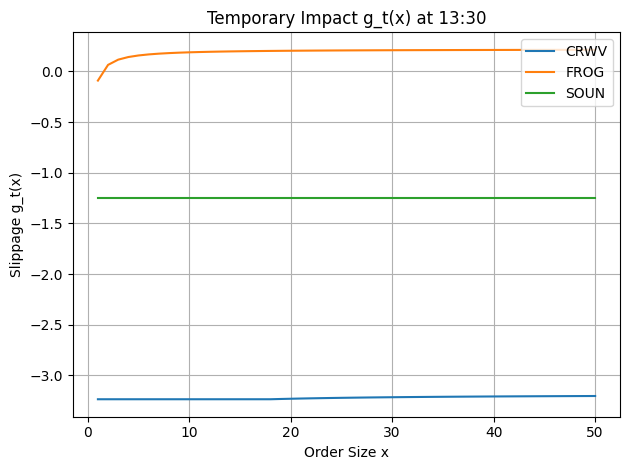

In [34]:
plot_impact(crwv, 'CRWV')
plot_impact(frog, 'FROG')
plot_impact(soun, 'SOUN')
plt.title('Temporary Impact g_t(x) at 13:30')
plt.xlabel('Order Size x')
plt.ylabel('Slippage g_t(x)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()